# Análisis Exploratorio de Datos (EDA)

En esta fase del proyecto, realizaremos un análisis exploratorio de los datos (EDA) de nuestros DataFrames, que incluyen información sobre Games, Reviews e Items. Antes de comenzar, cabe aclarar ya hemos realizado algunas tareas de limpieza y preprocesamiento de datos, como la eliminación de columnas no necesarias, nulos y duplicados para poder trabajar en las funciones y la creación de la API.

## Importación de las librerias.

In [1]:
# MANIPULACION DE LA DATA
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None) # MUESTRA TODAS LAS COLUNAS DE UN PANDAS DATAFRAME

# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# QUITAMOS LOS WARNINGS DE LAS SALIDAS DEL NOTEBOOK
import warnings
warnings.filterwarnings("ignore")

## Importamos Reviews.

In [2]:
df_reviews = pd.read_csv("df_reviews.csv")

In [3]:
df_reviews

,Unnamed: 0,item_id,recommend,user_id,sentiment_analysis,date
0,0,1250,True,76561197970982479,1,"November 5, 2011"
1,1,22200,True,76561197970982479,2,"July 15, 2011"
2,2,43110,True,76561197970982479,1,"April 21, 2011"
3,3,251610,True,js41637,1,"June 24, 2014"
4,4,227300,True,js41637,1,"September 8, 2013"
...,...,...,...,...,...,...
58426,59300,70,True,76561198312638244,2,NaN
58427,59301,362890,True,76561198312638244,1,NaN
58428,59302,273110,True,LydiaMorley,1,NaN
58429,59303,730,True,LydiaMorley,2,NaN


In [4]:
df_reviews.columns

Index(['Unnamed: 0', 'item_id', 'recommend', 'user_id', 'sentiment_analysis',
       'date'],
      dtype='object')

## Limpieza y formateo.

In [5]:
df_reviews = df_reviews.drop(columns= 'Unnamed: 0')

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             58431 non-null  int64 
 1   recommend           58431 non-null  bool  
 2   user_id             58431 non-null  object
 3   sentiment_analysis  58431 non-null  int64 
 4   date                48498 non-null  object
dtypes: bool(1), int64(2), object(2)
memory usage: 1.8+ MB


In [17]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

df_reviews['user_id'] = pd.to_numeric(df_reviews['user_id'], errors='coerce')


In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19580 entries, 0 to 58402
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   item_id             19580 non-null  int64         
 1   recommend           19580 non-null  bool          
 2   user_id             19580 non-null  float64       
 3   sentiment_analysis  19580 non-null  int64         
 4   date                19580 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 784.0 KB


## Resumen estadístico básico.

In [57]:
df_reviews['sentiment_analysis'].describe()


count    19580.000000
mean         1.223698
std          0.590811
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: sentiment_analysis, dtype: float64

## Análisis de duplicados y valores faltantes.

In [10]:
df_reviews.isna().sum()

item_id                   0
recommend                 0
user_id               34674
sentiment_analysis        0
date                   9933
dtype: int64

In [11]:
df_reviews.isnull().sum()

item_id                   0
recommend                 0
user_id               34674
sentiment_analysis        0
date                   9933
dtype: int64

In [12]:
df_reviews.duplicated().sum()

6848

In [13]:
df_reviews = df_reviews.dropna()

In [14]:
df_reviews

,item_id,recommend,user_id,sentiment_analysis,date
0,1250,True,7.656120e+16,1,2011-11-05
1,22200,True,7.656120e+16,2,2011-07-15
2,43110,True,7.656120e+16,1,2011-04-21
29,72850,True,7.656120e+16,0,2015-02-01
30,440,True,7.656120e+16,1,2014-06-20
...,...,...,...,...,...
58373,730,True,7.656120e+16,1,2015-11-28
58377,730,True,7.656120e+16,1,2015-07-18
58381,253980,True,7.656120e+16,2,2015-10-10
58391,730,True,7.294728e+10,0,2015-10-31


Volvemos a ver el resumen estadístico pero ahora con el df ya sin nulos y duplicados.

In [15]:
df_reviews.describe()

,item_id,user_id,sentiment_analysis,date
count,19580.000000,1.958000e+04,19580.000000,19580
mean,155602.363075,4.419978e+27,1.223698,2014-09-19 03:22:10.418794752
min,10.000000,0.000000e+00,0.000000,2010-11-23 00:00:00
25%,7632.500000,7.656120e+16,1.000000,2014-03-02 00:00:00
50%,209160.000000,7.656120e+16,1.000000,2014-09-08 00:00:00
75%,247000.000000,7.656120e+16,2.000000,2015-04-28 00:00:00
max,423880.000000,1.234568e+31,2.000000,2015-12-31 00:00:00
std,123498.376229,2.333963e+29,0.590811,NaN


## Distribución de fechas:
Analizamos la distribución de las fechas de recomendaciones a lo largo del tiempo.

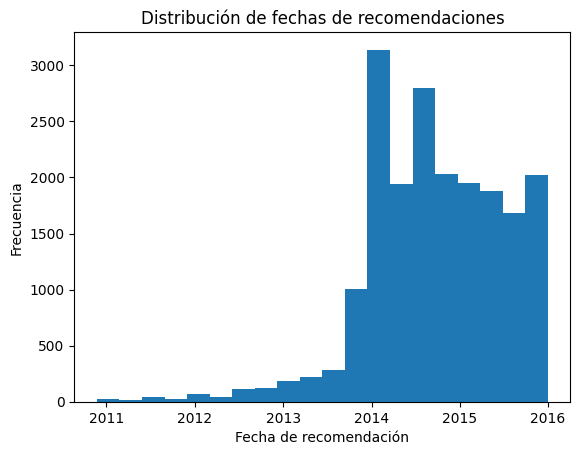

In [26]:
plt.hist(df_reviews['date'].dropna(), bins=20)
plt.xlabel('Fecha de recomendación')
plt.ylabel('Frecuencia')
plt.title('Distribución de fechas de recomendaciones')
plt.show()

Al analizar la distribución de las fechas de revisión en nuestros datos, observamos una tendencia interesante. Parece que las revisiones están sesgadas hacia la derecha, lo que sugiere que hubo relativamente pocas revisiones en los años iniciales, como 2011 y 2012, y que el número de revisiones comenzó a aumentar significativamente a partir de 2013. Esta tendencia de crecimiento continuó durante los años posteriores, con un pico de revisiones notables en los años 2014, 2015 y 2016. Este hallazgo podría tener implicaciones importantes para nuestro análisis y comprensión de cómo los usuarios han interactuado con los juegos a lo largo del tiempo.

## Distribución de Recomendaciones.

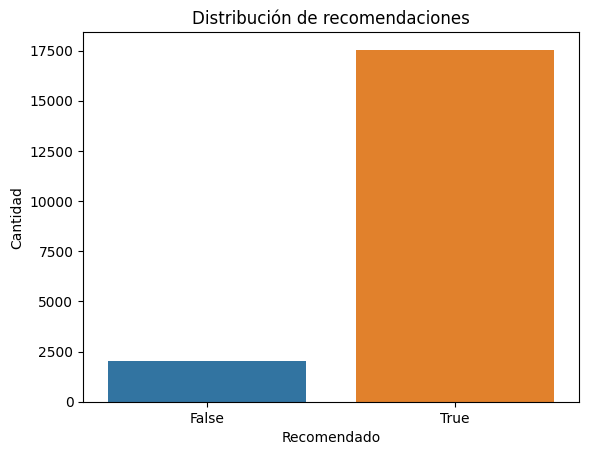

In [21]:
import seaborn as sns

sns.countplot(data=df_reviews, x='recommend')
plt.xlabel('Recomendado')
plt.ylabel('Cantidad')
plt.title('Distribución de recomendaciones')
plt.show()


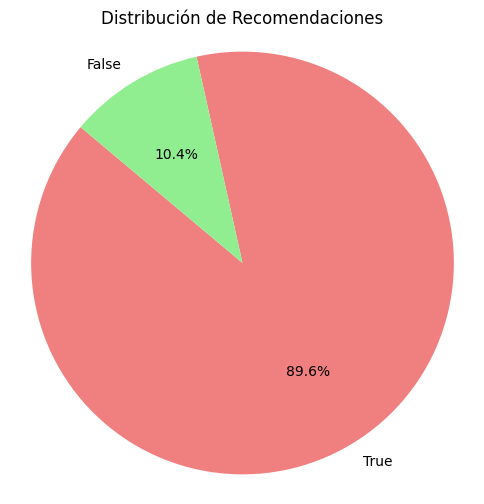

In [31]:
# Contar la cantidad de recomendaciones y calcular las proporciones
recommend_counts = df_reviews['recommend'].value_counts()
labels = recommend_counts.index
sizes = recommend_counts.values

# Crear un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title('Distribución de Recomendaciones')
plt.axis('equal')  # Esto asegura que el gráfico sea un círculo perfecto
plt.show()

El análisis de nuestra base de datos revela un fenómeno interesante y alentador en el mundo de los juegos. Aproximadamente el 90% de los juegos registrados en nuestro conjunto de datos han recibido recomendaciones positivas por parte de los usuarios, lo que indica que la gran mayoría de los juegos son bien recibidos por la comunidad de jugadores. Esta abrumadora aprobación refleja la satisfacción general de los usuarios y sugiere que la calidad y la experiencia de juego proporcionada por la mayoría de los juegos son altamente valoradas.

Por otro lado, alrededor del 10% de los juegos en nuestro conjunto de datos han recibido recomendaciones negativas o no han sido respaldados por los usuarios. Aunque esta proporción es significativamente menor en comparación con los juegos recomendados, no podemos pasar por alto la importancia de esta minoría. Estos juegos no recomendados pueden representar áreas de mejora para los desarrolladores o, en algunos casos, pueden haber experimentado desafíos en la satisfacción de los jugadores.

En conjunto, esta distribución de recomendaciones en la industria de los juegos refleja la diversidad de experiencias disponibles para los jugadores y ofrece valiosas perspectivas sobre la calidad y la aceptación de los juegos en el mercado. Además, este equilibrio entre recomendaciones positivas y negativas resalta la importancia de la retroalimentación de los usuarios en la mejora continua de la industria y la toma de decisiones informadas por parte de los jugadores.

Sin embargo, es importante señalar que la distribución de recomendaciones en nuestros datos puede estar influenciada por varios factores, incluidos los sesgos en la recopilación de datos y las preferencias individuales de los usuarios.

## Distribución del Análisis de Sentimiento.

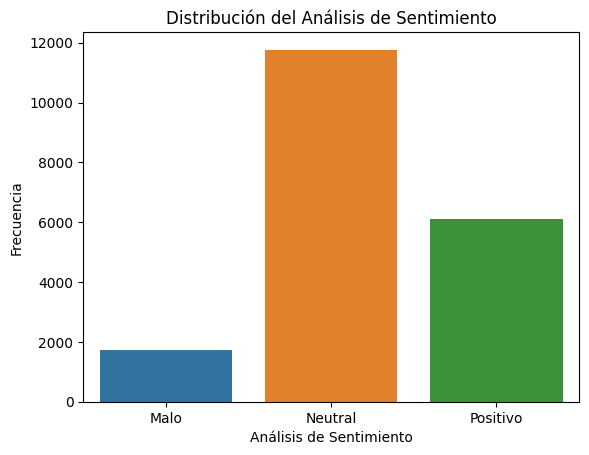

In [30]:
# Crea un gráfico de barras para el análisis de sentimiento
sns.countplot(data=df_reviews, x='sentiment_analysis')

# Etiquetas y título del gráfico
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del Análisis de Sentimiento')

# Etiquetas personalizadas para los valores en el eje x
plt.gca().set_xticklabels(['Malo', 'Neutral', 'Positivo'])

# Muestra el gráfico
plt.show()


## Importamos Games.

In [32]:
df_games = pd.read_csv('df_games.csv')  


In [33]:
df_games.head()

,genres,title,release_date,tags,id
0,"'Action', 'Casual', 'Indie', 'Simulation', 'St...",lost summoner kitty,2018-01-04,"'Strategy', 'Action', 'Indie', 'Casual', 'Simu...",761140
1,"'Free to Play', 'Indie', 'RPG', 'Strategy'",ironbound,2018-01-04,"'Free to Play', 'Strategy', 'Indie', 'RPG', 'C...",643980
2,"'Casual', 'Free to Play', 'Indie', 'Simulation...",real pool 3d - poolians,2017-07-24,"'Free to Play', 'Simulation', 'Sports', 'Casua...",670290
3,"'Action', 'Adventure', 'Casual'",弹炸人2222,2017-12-07,"'Action', 'Adventure', 'Casual'",767400
4,"'Action', 'Adventure', 'Simulation'",battle royale trainer,2018-01-04,"'Action', 'Adventure', 'Simulation', 'FPS', 'S...",772540


In [34]:
df_games.columns

Index(['genres', 'title', 'release_date', 'tags', 'id'], dtype='object')

In [35]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28831 non-null  object
 1   title         30065 non-null  object
 2   release_date  29780 non-null  object
 3   tags          29904 non-null  object
 4   id            30065 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


## Limpieza y formateo

In [36]:
df_games = df_games.drop(columns= 'tags')

In [38]:
df_games['date'] = pd.to_datetime(df_games['release_date'])

In [39]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28831 non-null  object        
 1   title         30065 non-null  object        
 2   release_date  29780 non-null  object        
 3   id            30065 non-null  int64         
 4   date          29780 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


## Análisis de duplicados y valores faltantes.

In [41]:
df_games.duplicated().sum()

0

In [42]:
df_games.isnull().sum()

genres          1234
title              0
release_date     285
id                 0
date             285
dtype: int64

In [44]:
df_games = df_games.dropna()

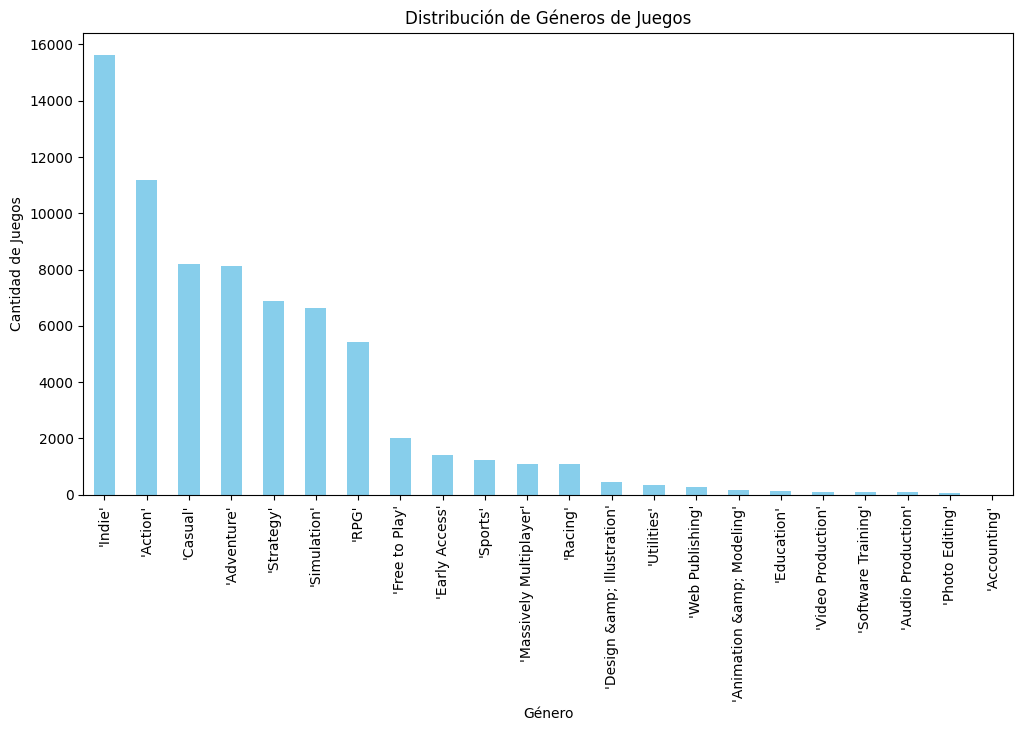

In [46]:

# Divide la columna 'genres' y crea una Serie con géneros individuales
genres_series = df_games['genres'].str.split(',').explode().str.strip()

# Contar la cantidad de juegos por género
genre_counts = genres_series.value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.show()


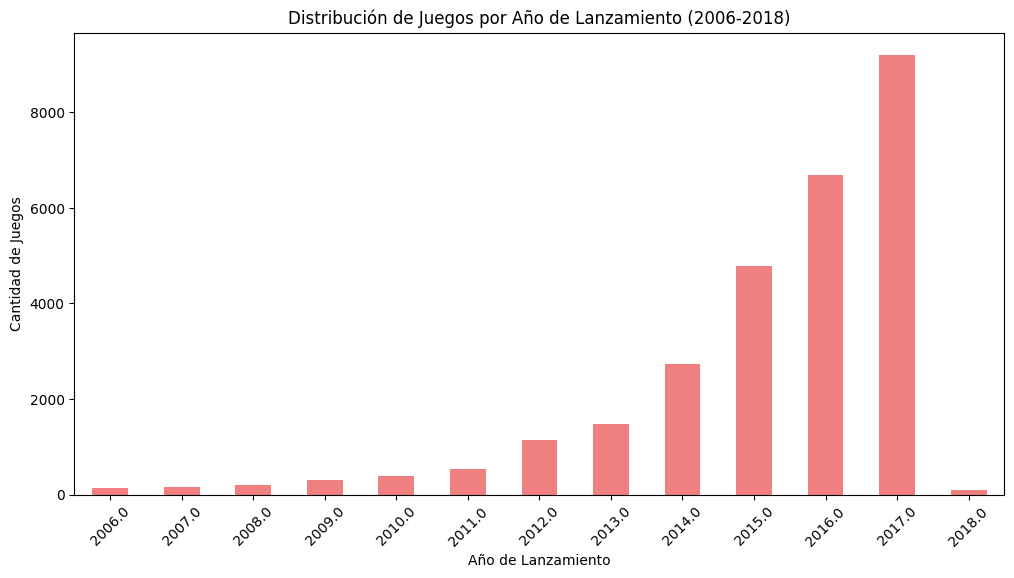

In [48]:


# Extraer el año de lanzamiento de la columna 'release_date'
df_games['release_year'] = df_games['release_date'].str.extract(r'(\d{4})').astype(float)

# Filtrar los juegos con años de lanzamiento entre 2006 y 2018
filtered_games = df_games[(df_games['release_year'] >= 2006) & (df_games['release_year'] <= 2018)]

# Contar la cantidad de juegos por año de lanzamiento en el rango especificado
year_counts = filtered_games['release_year'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Juegos por Año de Lanzamiento (2006-2018)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.show()


## Importamos Items.

In [52]:
ruta_archivo_parquet = 'items.parquet' 

# Lee el archivo Parquet en un DataFrame
df_items = pd.read_parquet(ruta_archivo_parquet)

# Ahora puedes trabajar con el DataFrame 'df'


In [53]:
df_items

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,7.656120e+16
1,20,Team Fortress Classic,0,7.656120e+16
2,30,Day of Defeat,7,7.656120e+16
3,40,Deathmatch Classic,0,7.656120e+16
4,50,Half-Life: Opposing Force,0,7.656120e+16
...,...,...,...,...
5153204,346330,BrainBread 2,0,7.656120e+16
5153205,373330,All Is Dust,0,7.656120e+16
5153206,388490,One Way To Die: Steam Edition,3,7.656120e+16
5153207,521570,You Have 10 Seconds 2,4,7.656120e+16


In [54]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229076 entries, 0 to 5153208
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   item_name         object 
 2   playtime_forever  int64  
 3   user_id           float64
dtypes: float64(1), int64(2), object(1)
memory usage: 85.0+ MB


## Análisis de duplicados y valores faltantes.

In [55]:
df_items.duplicated().sum()

0

In [56]:
df_items.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
user_id             0
dtype: int64

## Resumen estadístico básico.

In [58]:
df_items['playtime_forever'].describe()


count    2.229076e+06
mean     1.149095e+03
std      5.552670e+03
min      0.000000e+00
25%      0.000000e+00
50%      5.400000e+01
75%      4.870000e+02
max      6.324520e+05
Name: playtime_forever, dtype: float64

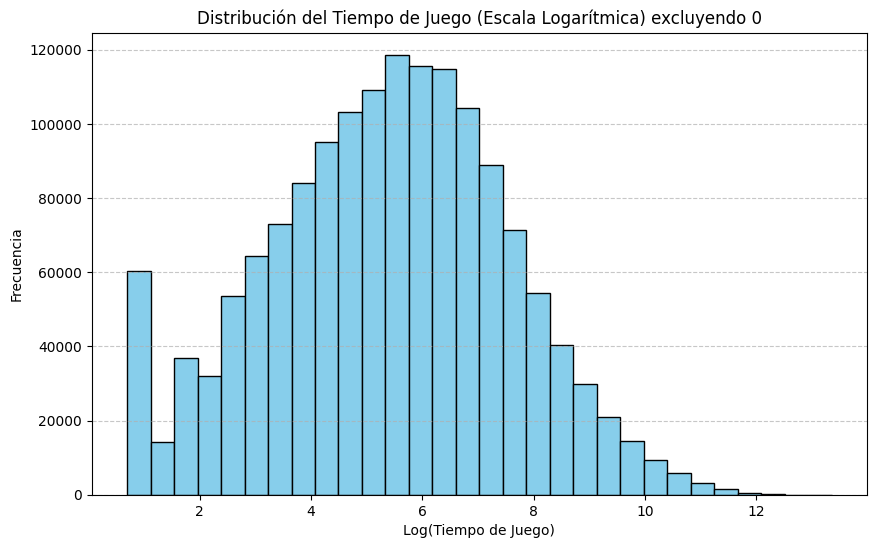

In [64]:

# Filtrar los datos para excluir valores igual a cero
df_filtered = df_items[df_items['playtime_forever'] > 0]

# Aplicar una transformación logarítmica a 'playtime_forever' y agregar una pequeña constante para evitar log(0)
df_filtered['playtime_log'] = np.log1p(df_filtered['playtime_forever'])

# Crear un histograma de 'playtime_log'
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['playtime_log'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log(Tiempo de Juego)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo de Juego (Escala Logarítmica) excluyendo 0')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Este código filtra los datos para incluir solo las filas donde playtime_forever es mayor que cero (0), y luego crea el histograma basado en la columna playtime_log. De esta manera, el histograma no incluirá los valores igual a cero y proporcionará una mejor visualización de la distribución de los tiempos de juego excluyendo esos valores.

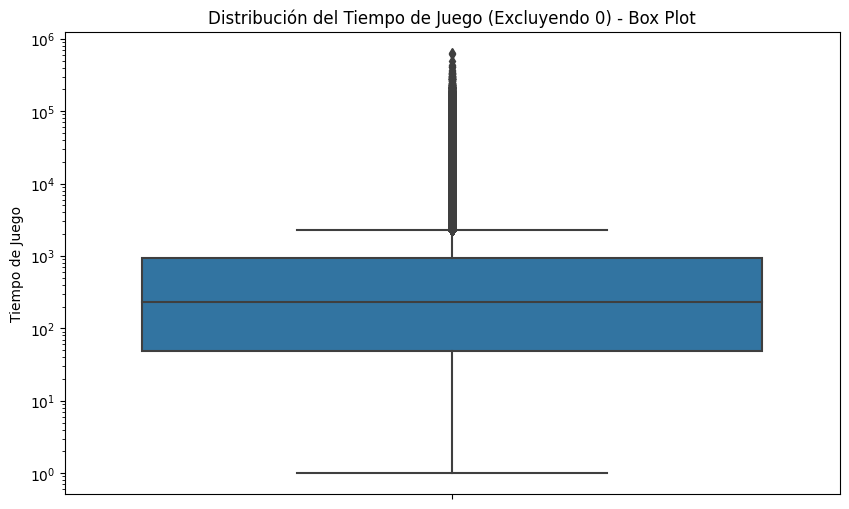

In [66]:
# Filtrar los datos para excluir valores igual a cero
df_filtered = df[df['playtime_forever'] > 0]

# Crear un box plot del tiempo de juego en escala logarítmica
plt.figure(figsize=(10, 6))
sns.boxplot(y='playtime_forever', data=df_filtered)
plt.title('Distribución del Tiempo de Juego (Excluyendo 0) - Box Plot')
plt.ylabel('Tiempo de Juego')
plt.yscale('log')  # Aplicar escala logarítmica en el eje y
plt.show()
